In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 4]

## Intro
Let's implement a simple logistic regression algorithm here. The task here is to classify a record as `1` or `0` depending on the record's multiple features.\
Let's load some data where we have 1 feature and a target


In [69]:
def load_data():
    return np.array([
        [-4, 0],
        [-2.5, 0],
        [0, 0],
        [2, 1],
        [6, 1],
        [9, 1]
    ])

In [70]:
df = load_data()
print(df.shape)
dfx = df[:, 0].reshape(1, 6)
dfy = df[:, 1].reshape(1, 6)
print(dfx, dfx.shape)
print(dfy, dfy.shape)

(6, 2)
[[-4.  -2.5  0.   2.   6.   9. ]] (1, 6)
[[0. 0. 0. 1. 1. 1.]] (1, 6)


Let's also plot and check how this would look like

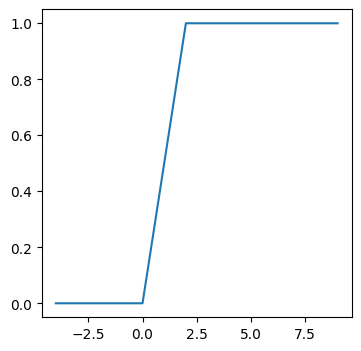

In [71]:
plt.plot(dfx[0], dfy[0])
plt.show()

## Sigmoid function
Above graph is similar to a sigmoid graph. So let's try building it.

In [72]:
def sigmoid(dfz):
    return 1 / (1 + np.exp(-dfz))


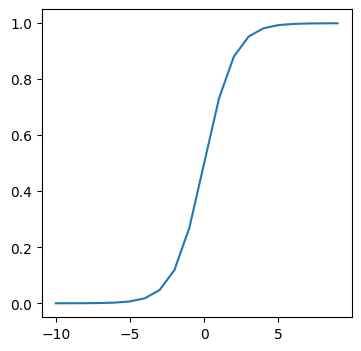

In [73]:
# testing for different values of x
x = np.arange(-10, 10, 1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

Good! Let's begin with the actual algorithm.

Logistic regression is quite similar to Linear regression, in terms of initial formula.\
Instead of directly using `wx + b`, we use `sigmoid(wx + b)`. And our aim is to estimate these params w and b.

Let's write the predict method.

In [79]:
def predict(dfx, params):
    ws = params[:-1]
    b = params[-1].reshape(1, 1)
    dfz = np.matmul(ws.T, dfx) + b
    return sigmoid(dfz) # (sigmoid(dfz) > 0.5) * 1 # Default threshold is 0.5. We can change depending on problem.


In [92]:
def mle_cost(dfy1, dfh1):
    dfy = dfy1[0]
    dfh = dfh1[0]
    m = dfy1.shape[1]
    error = np.dot(dfy, np.log(dfh)) + np.dot(1 - dfy, np.log(1 - dfh))
    return (-1 / m) * error

In [93]:
def grad_descent(dfx, dfy, dfh, params, alpha):
    diff = dfy - dfh
    m = dfy.shape[1]
    dW = (-1 / m) * np.matmul(dfx, diff.T)
    db = (-1 / m) * np.sum(diff)
    W = params[: -1]
    b = params[-1].reshape(1, 1)
    W = W - (alpha * dW)
    b = b - (alpha * db)
    return np.concatenate((W, b), axis=0)

In [85]:
def train(dfx, dfy, params, alpha, runs):
    log_lim = runs // 10
    train_params = params
    train_details = []
    for i in range(runs):
        dfh = predict(dfx, train_params)
        cost = mle_cost(dfy, dfh)
        train_details.append({
            'cost': cost,
            'ws': train_params[:-1],
            'b': train_params[-1],
            'dfh': dfh
        })
        if i % log_lim == 0:
            print(f'Iteration: #{i + 1}: cost = {cost}, ws = {train_params[:-1]}, b = {train_params[-1]}')
        new_params = grad_descent(dfx, dfy, dfh, train_params, alpha)
        train_params = new_params
    y_cap = predict(dfx, train_params)
    cost = mle_cost(dfy, y_cap)
    train_details.append({
        'cost': cost,
        'ws': train_params[:-1],
        'b': train_params[-1],
        'dfh': y_cap
    })
    print(f'Training complete. cost = {cost}, ws = {train_params[:-1]}, b = {train_params[-1]}')
    return [train_params, train_details]

In [96]:
params = np.random.rand(2, 1) # n X 1 dim
train_params, train_details = train(dfx, dfy, params, 0.001, 100000)

Iteration: #1: cost = 0.24807276960435068, ws = [[0.707601]], b = [0.5332727]
Iteration: #10001: cost = 0.10828655131185151, ws = [[1.40873303]], b = [-0.31829159]
Iteration: #20001: cost = 0.07406109458102647, ws = [[1.70864018]], b = [-0.81627464]
Iteration: #30001: cost = 0.05630069418585774, ws = [[1.94485752]], b = [-1.16367002]
Iteration: #40001: cost = 0.04529745781262596, ws = [[2.14482082]], b = [-1.42754364]
Iteration: #50001: cost = 0.03779319955851647, ws = [[2.3176805]], b = [-1.63960552]
Iteration: #60001: cost = 0.032353257747632334, ws = [[2.46913559]], b = [-1.81669219]
Iteration: #70001: cost = 0.028236598839134725, ws = [[2.6033757]], b = [-1.96863861]
Iteration: #80001: cost = 0.025018783913776238, ws = [[2.72358385]], b = [-2.10164986]
Iteration: #90001: cost = 0.022438576442248382, ws = [[2.83220684]], b = [-2.21988514]
Training complete. cost = 0.02032635581514334, ws = [[2.93114584]], b = [-2.32626806]


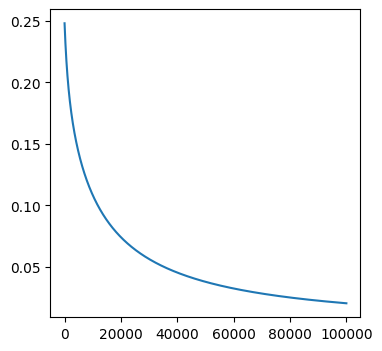

In [97]:
train_costs = [x['cost'] for x in train_details]
train_itr = np.arange(0, len(train_costs))
plt.plot(train_itr, train_costs)

## Test

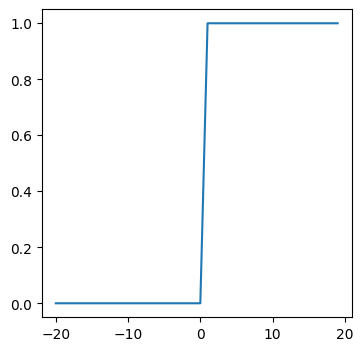

In [101]:
dftest = np.arange(-20, 20, 1)
n = len(dftest)
dftest = dftest.reshape(1, n)
z = (predict(dftest, train_params) > 0.5) * 1
plt.plot(dftest[0], z[0])
plt.show()

Awesome! Our model is ready for logistic regressions!